In [43]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [44]:
#1.Load the dataset from a CSV file named sample_dataset.csv into a Pandas DataFrame. Display the first few rows of the dataset.
data=pd.read_csv('sample_dataset.csv')
data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,FlowerA
1,4.9,3.0,1.4,0.2,FlowerA
2,4.7,3.2,1.3,0.2,FlowerA
3,4.6,3.1,1.5,0.2,FlowerA
4,5.0,3.6,1.4,0.2,FlowerA


In [45]:
#2.Generate summary statistics for this dataset. What are the mean and standard deviation of the Sepal Length?
summary_statistics=data.describe()
mean_sepal_length=data['Sepal Length (cm)'].mean()
print("mean of sepal_length is :",mean_sepal_length)
stanadard_deviation_sepal_length=data['Sepal Length (cm)'].std()
print("stanadard deviation of sepal length is :",stanadard_deviation_sepal_length)

mean of sepal_length is : 5.906666666666666
stanadard deviation of sepal length is : 0.8737984948051866


In [46]:
#3.Check for any missing values in the dataset. How would you handle them if there were any?
print("checking for missing values:")
print(data.isnull().sum())

checking for missing values:
Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64


In [47]:
#4.Convert the species labels to numerical values using a mapping dictionary. For example, map 'FlowerA' to 0, 'FlowerB' to 1, and 'FlowerC' to 2.
species_mapping = {'FlowerA': 0, 'FlowerB': 1, 'FlowerC': 2}
data['Species'] = data['Species'].map(species_mapping)
print("Mapped dataset:")
print(data.head())


Mapped dataset:
   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [48]:
#5.Split the dataset into training and testing sets with 70% training data and 30% testing data. Ensure that the split is stratified based on the species.
X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [49]:
#6.Train a decision tree classifier on the training data. What parameters would you use for the decision tree?
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
# Parameters used (default parameters for simplicity)
print("Parameters used for Decision Tree Classifier:")
print(model.get_params())


Parameters used for Decision Tree Classifier:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


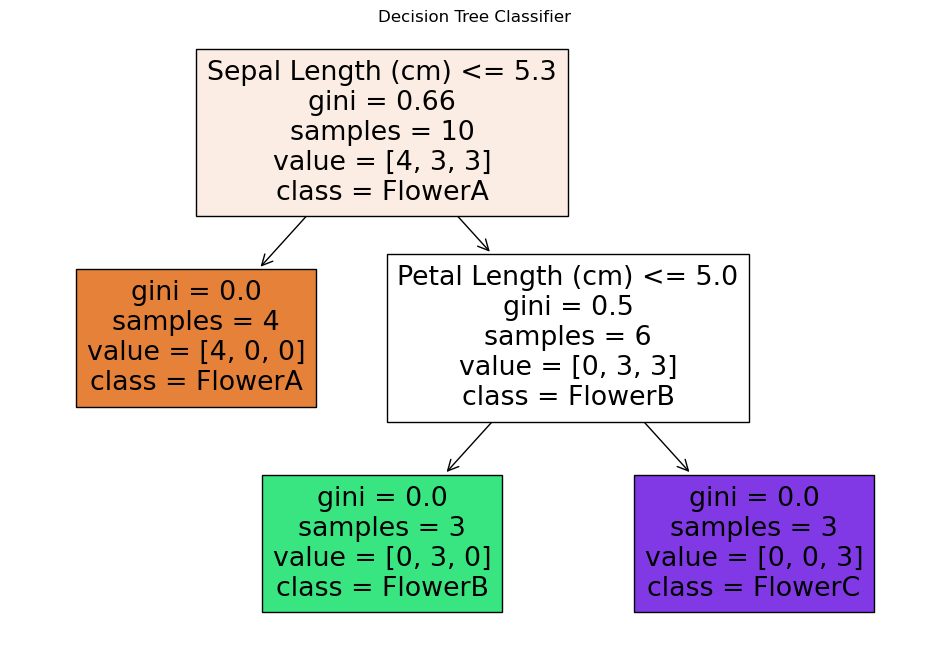

In [51]:
#7.Visualize the trained decision tree.
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=list(species_mapping.keys()))
plt.title("Decision Tree Classifier")
plt.show()

In [39]:
#8.Predict the species for the testing data and compute the accuracy.
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier:", accuracy)


Accuracy of Decision Tree Classifier: 1.0


In [40]:
#9.Generate a classification report and a confusion matrix for the predictions.
print("nClassification Report:")
print(classification_report(y_test, y_pred, target_names=species_mapping.keys()))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


nClassification Report:
              precision    recall  f1-score   support

     FlowerA       1.00      1.00      1.00         1
     FlowerB       1.00      1.00      1.00         2
     FlowerC       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[1 0 0]
 [0 2 0]
 [0 0 2]]
